# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model 

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

epochs = 10

In [2]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [3]:
def print_lines(hist, epochs):
    epoch = np.arange(epochs+1)

    plt.figure(figsize=(16,7))
    plt.plot(epoch,[0]+hist.history['accuracy'],'-',label = 'train')
    plt.plot(epoch,[0]+hist.history['val_accuracy'],'--', label = 'val')
    plt.legend()
    plt.grid('On')

    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

In [4]:
all_hist = []

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.7124 - accuracy: 0.7481 - val_loss: 0.3809 - val_accuracy: 0.8650
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3414 - accuracy: 0.8786 - val_loss: 0.3499 - val_accuracy: 0.8759
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2893 - accuracy: 0.8959 - val_loss: 0.2912 - val_accuracy: 0.8955
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2602 - accuracy: 0.9070 - val_loss: 0.2795 - val_accuracy: 0.8970
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2374 - accuracy: 0.9139 - val_loss: 0.2642 - val_accuracy: 0.9032
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2081 - accuracy: 0.9238 - val_loss: 0.2727 - val_accuracy: 0.9014
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1935 - accuracy: 0.9280 - val_loss: 0.2388 - val_accuracy: 0.9144
Epoch 

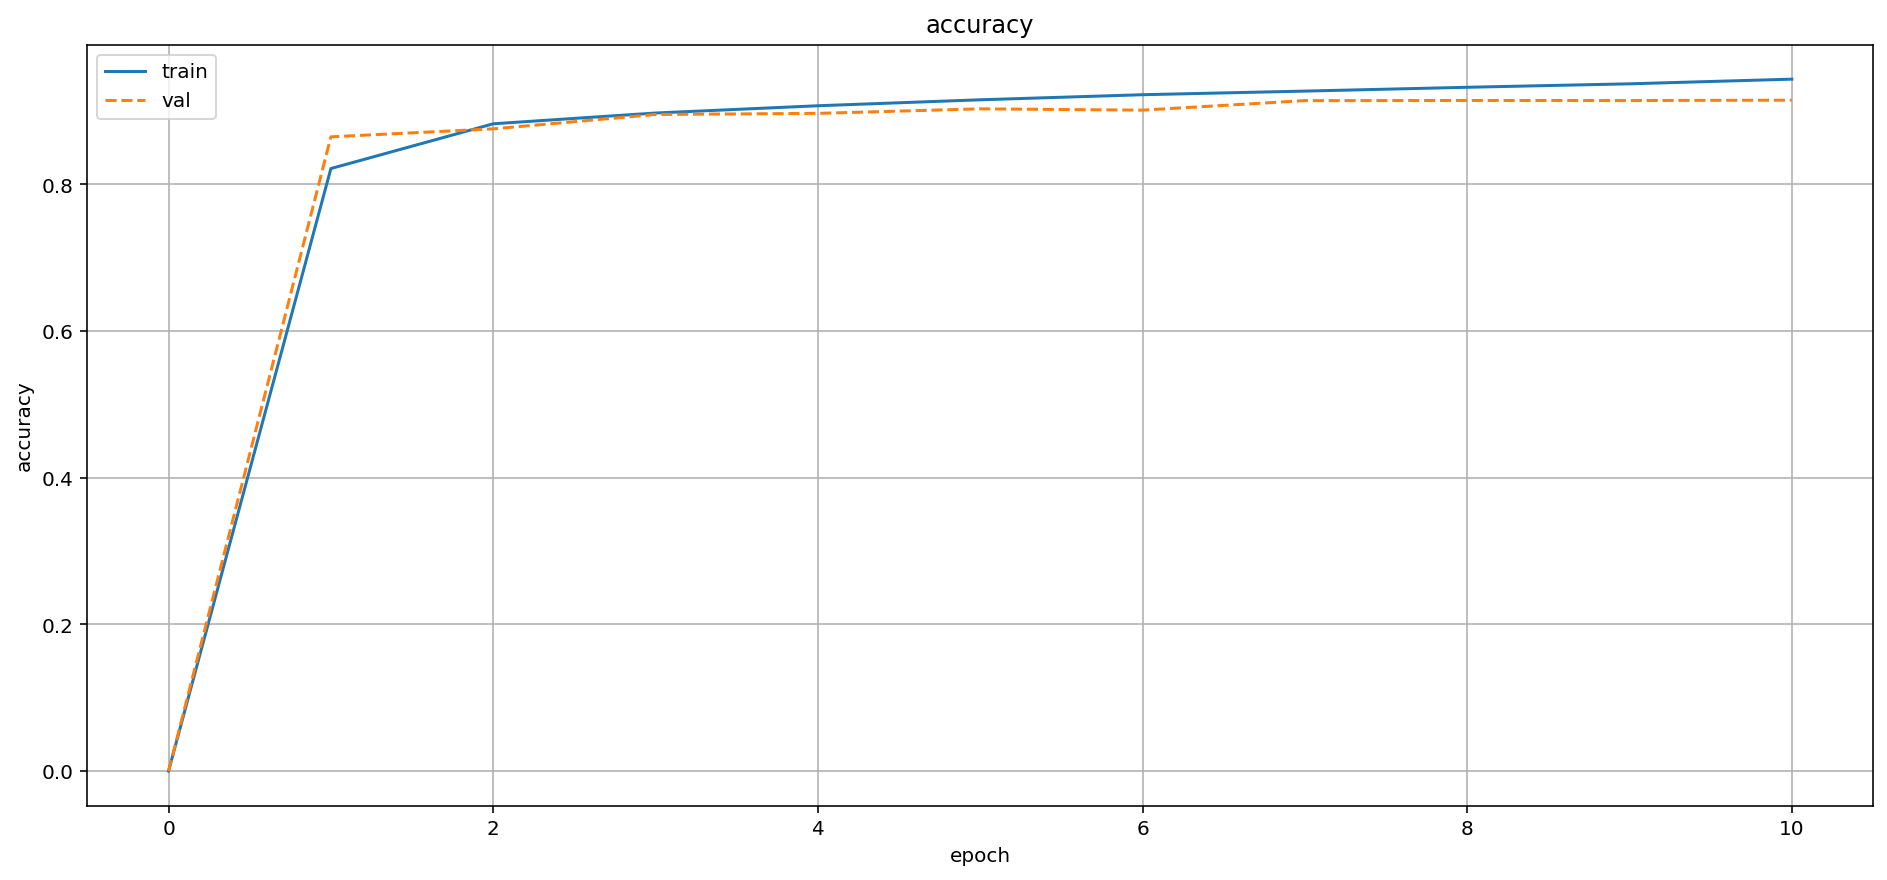

Wall time: 28.1 s


In [5]:
%%time

# Базовая модель AlexNET (отсюда: https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html, но без дропаутов)
model = Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# компилияция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучаем модель
hist = model.fit(x=x_train,y=y_train, epochs=epochs, batch_size=128, validation_data=(x_test, y_test), verbose=1)
all_hist.append(hist)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

print_lines(hist, epochs)

### Добавим слои

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 1.1406 - accuracy: 0.5805 - val_loss: 0.5148 - val_accuracy: 0.8055
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4655 - accuracy: 0.8270 - val_loss: 0.4066 - val_accuracy: 0.8545
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3899 - accuracy: 0.8577 - val_loss: 0.3813 - val_accuracy: 0.8610
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3451 - accuracy: 0.8744 - val_loss: 0.3461 - val_accuracy: 0.8758
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3161 - accuracy: 0.8842 - val_loss: 0.3390 - val_accuracy: 0.8821
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3064 - accuracy: 0.8877 - val_loss: 0.3234 - val_accuracy: 0.8817
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2859 - accuracy: 0.8951 - val_loss: 0.3186 - val_accuracy: 0.8845
Epoch 

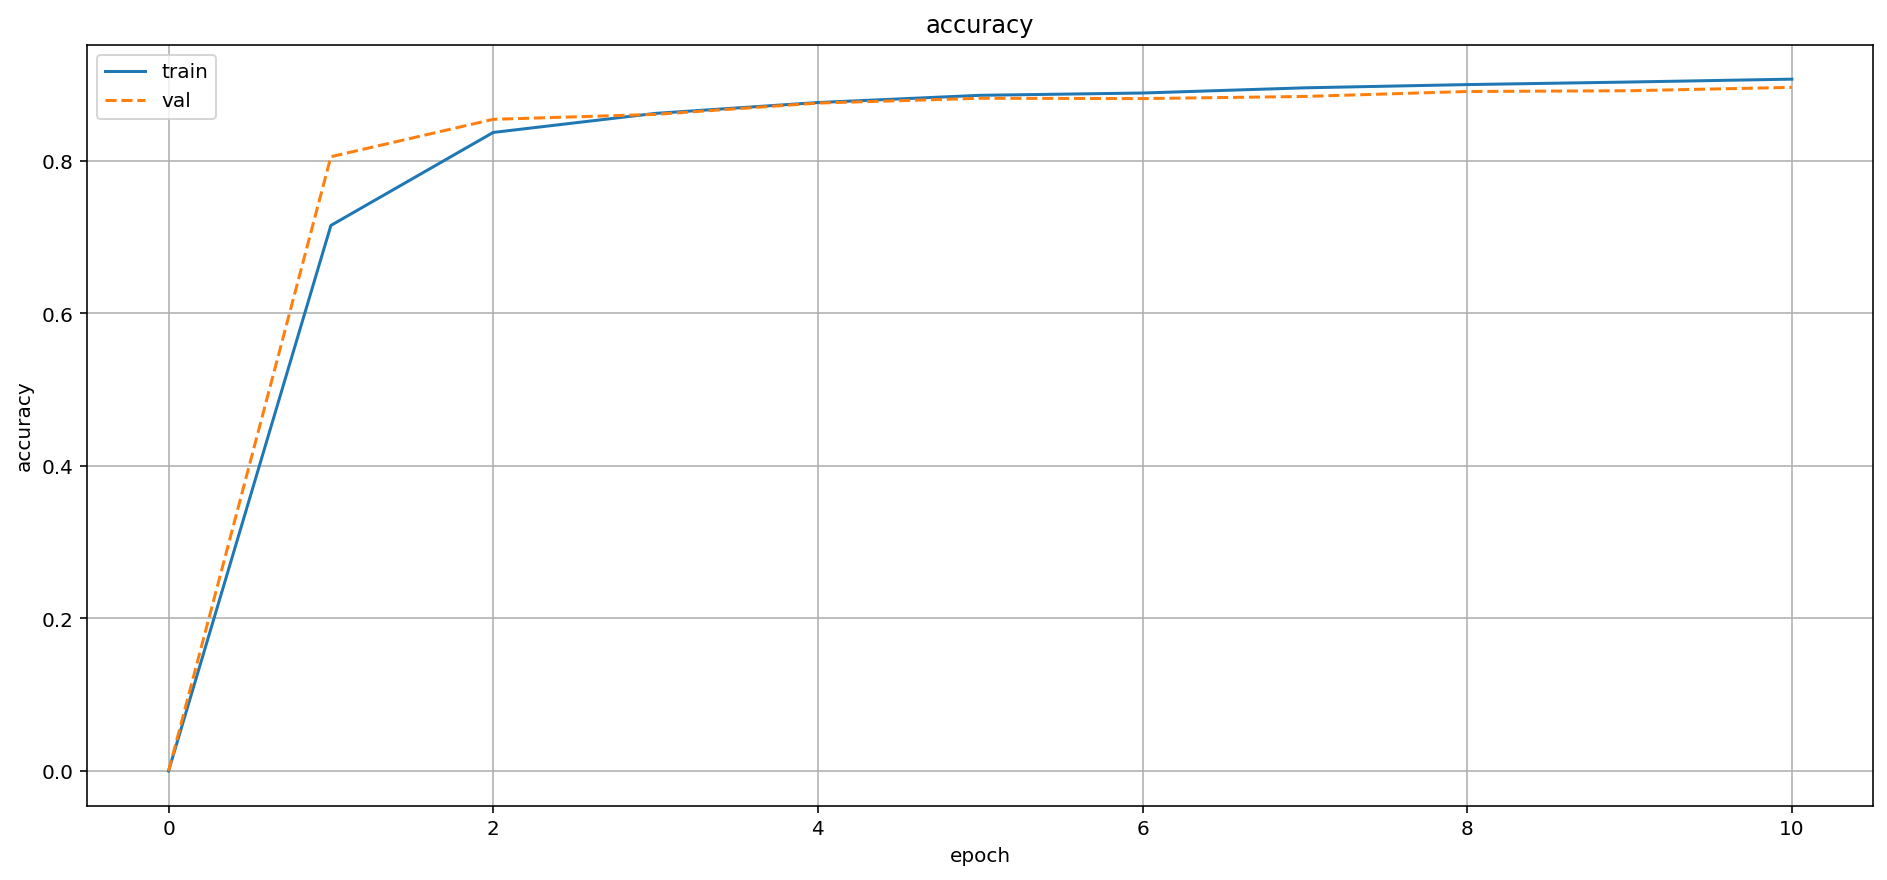

Wall time: 30.8 s


In [6]:
%%time

model = Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# компилияция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучаем модель
hist = model.fit(x=x_train,y=y_train, epochs=epochs, batch_size=128, validation_data=(x_test, y_test), verbose=1)
all_hist.append(hist)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

print_lines(hist, epochs)

Наблюдение: стало хуже и дольше базовой модели

### Увеличим ширину сети

(если я, конечно, правильно понял, что тут речь о параметре фильтров)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.6229 - accuracy: 0.7741 - val_loss: 0.3147 - val_accuracy: 0.8876
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2897 - accuracy: 0.8960 - val_loss: 0.2909 - val_accuracy: 0.8953
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2357 - accuracy: 0.9120 - val_loss: 0.2457 - val_accuracy: 0.9116
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2007 - accuracy: 0.9262 - val_loss: 0.2457 - val_accuracy: 0.9139
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1717 - accuracy: 0.9354 - val_loss: 0.2334 - val_accuracy: 0.9182
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1501 - accuracy: 0.9459 - val_loss: 0.2411 - val_accuracy: 0.9144
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1216 - accuracy: 0.9553 - val_loss: 0.2330 - val_accuracy: 0.9218

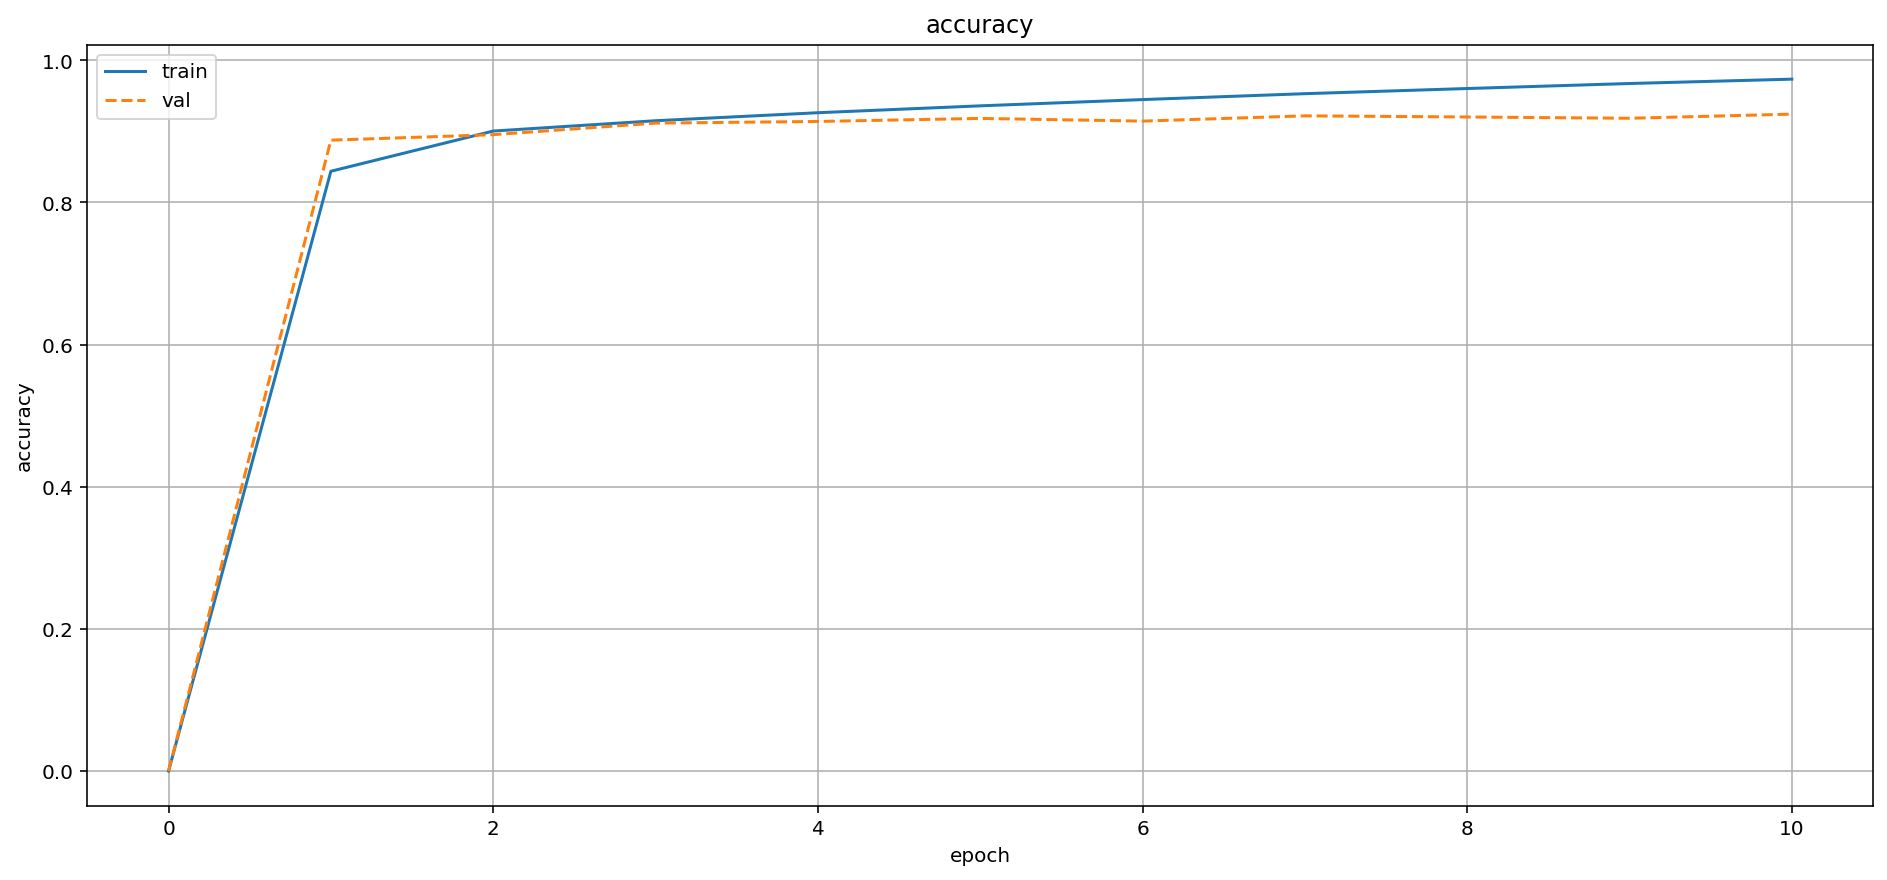

Wall time: 1min 9s


In [7]:
%%time

model = Sequential()
model.add(layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# компилияция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучаем модель
hist = model.fit(x=x_train,y=y_train, epochs=epochs, batch_size=128, validation_data=(x_test, y_test), verbose=1)
all_hist.append(hist)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

print_lines(hist, epochs)

Наблюдение: стало вроде чуть получше базовой модели, только она, похоже, теперь быстрее переобучается

## Сравнение с полносвязной моделью

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.7517 - accuracy: 0.7462 - val_loss: 0.4516 - val_accuracy: 0.8448
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8540 - val_loss: 0.4167 - val_accuracy: 0.8514
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8696 - val_loss: 0.3951 - val_accuracy: 0.8592
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8817 - val_loss: 0.3724 - val_accuracy: 0.8681
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8860 - val_loss: 0.3684 - val_accuracy: 0.8658
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8900 - val_loss: 0.3622 - val_accuracy: 0.8686
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2954 - accuracy: 0.8933 - val_loss: 0.3422 - val_accuracy: 0.8766
Epoch 

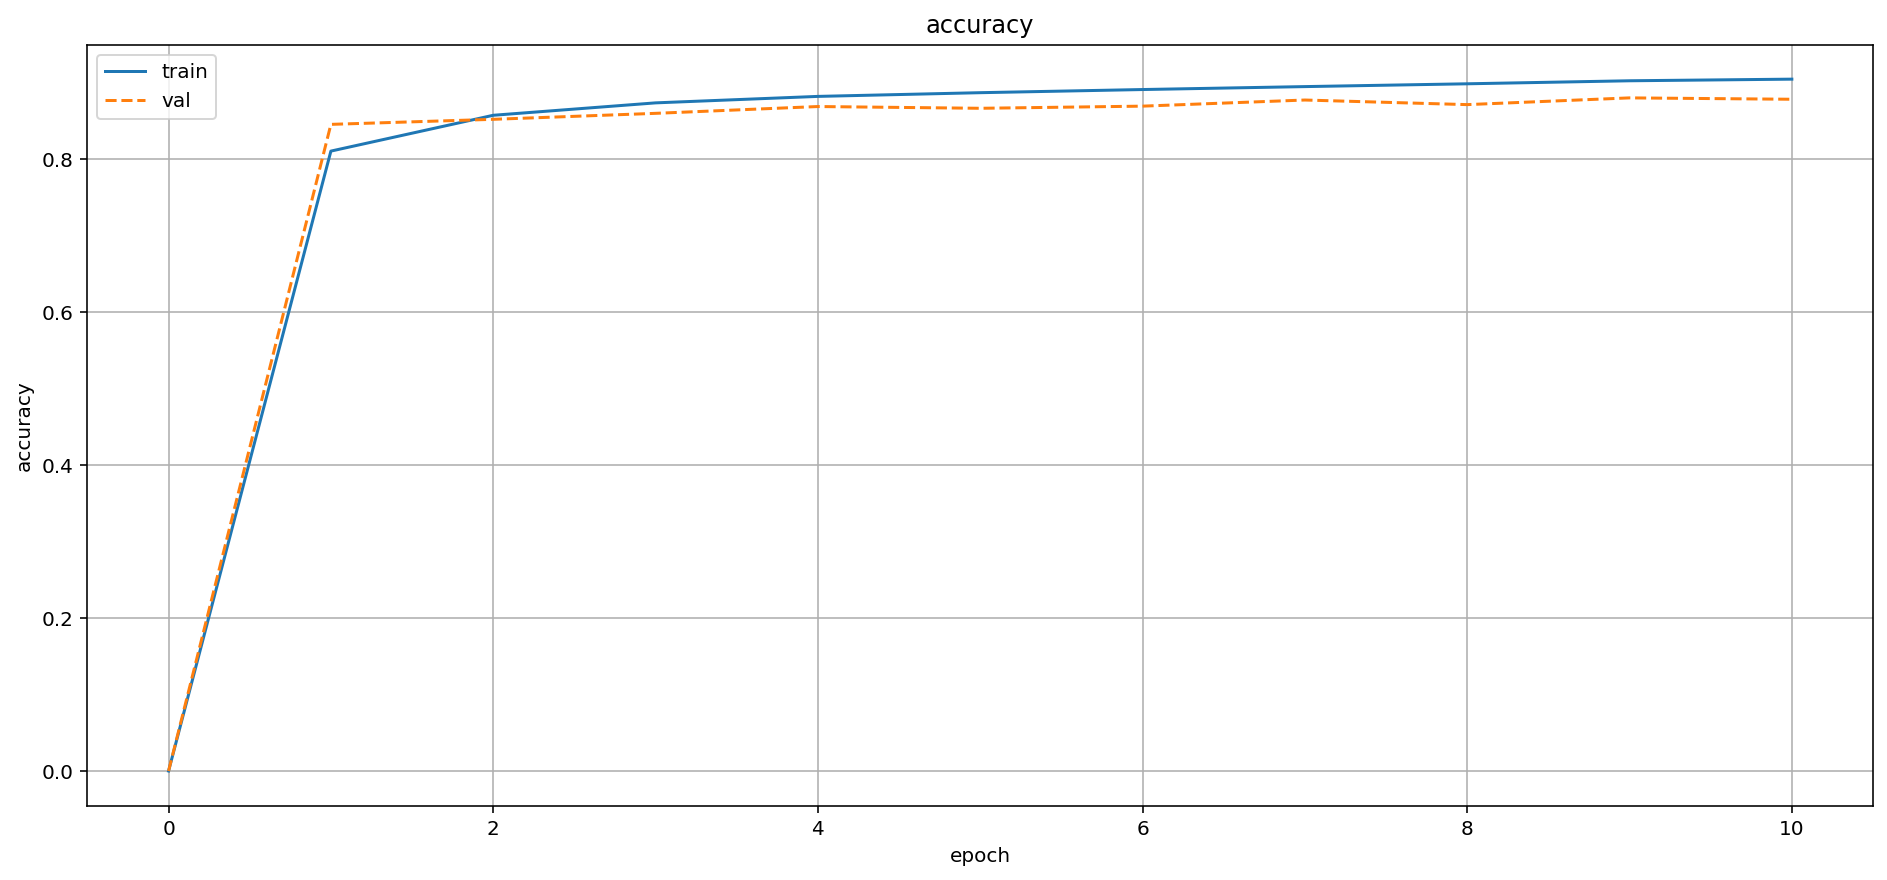

Wall time: 12.8 s


In [8]:
%%time

model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))

# компилияция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучаем модель
hist = model.fit(x=x_train,y=y_train, epochs=epochs, batch_size=128, validation_data=(x_test, y_test), verbose=1)
all_hist.append(hist)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

print_lines(hist, epochs)

Наблюдение: получилось довольно неплохо - не то, чтобы прямо сильно хуже базовой модели, зато работает очень быстро

### Сводные результаты (на валидации)

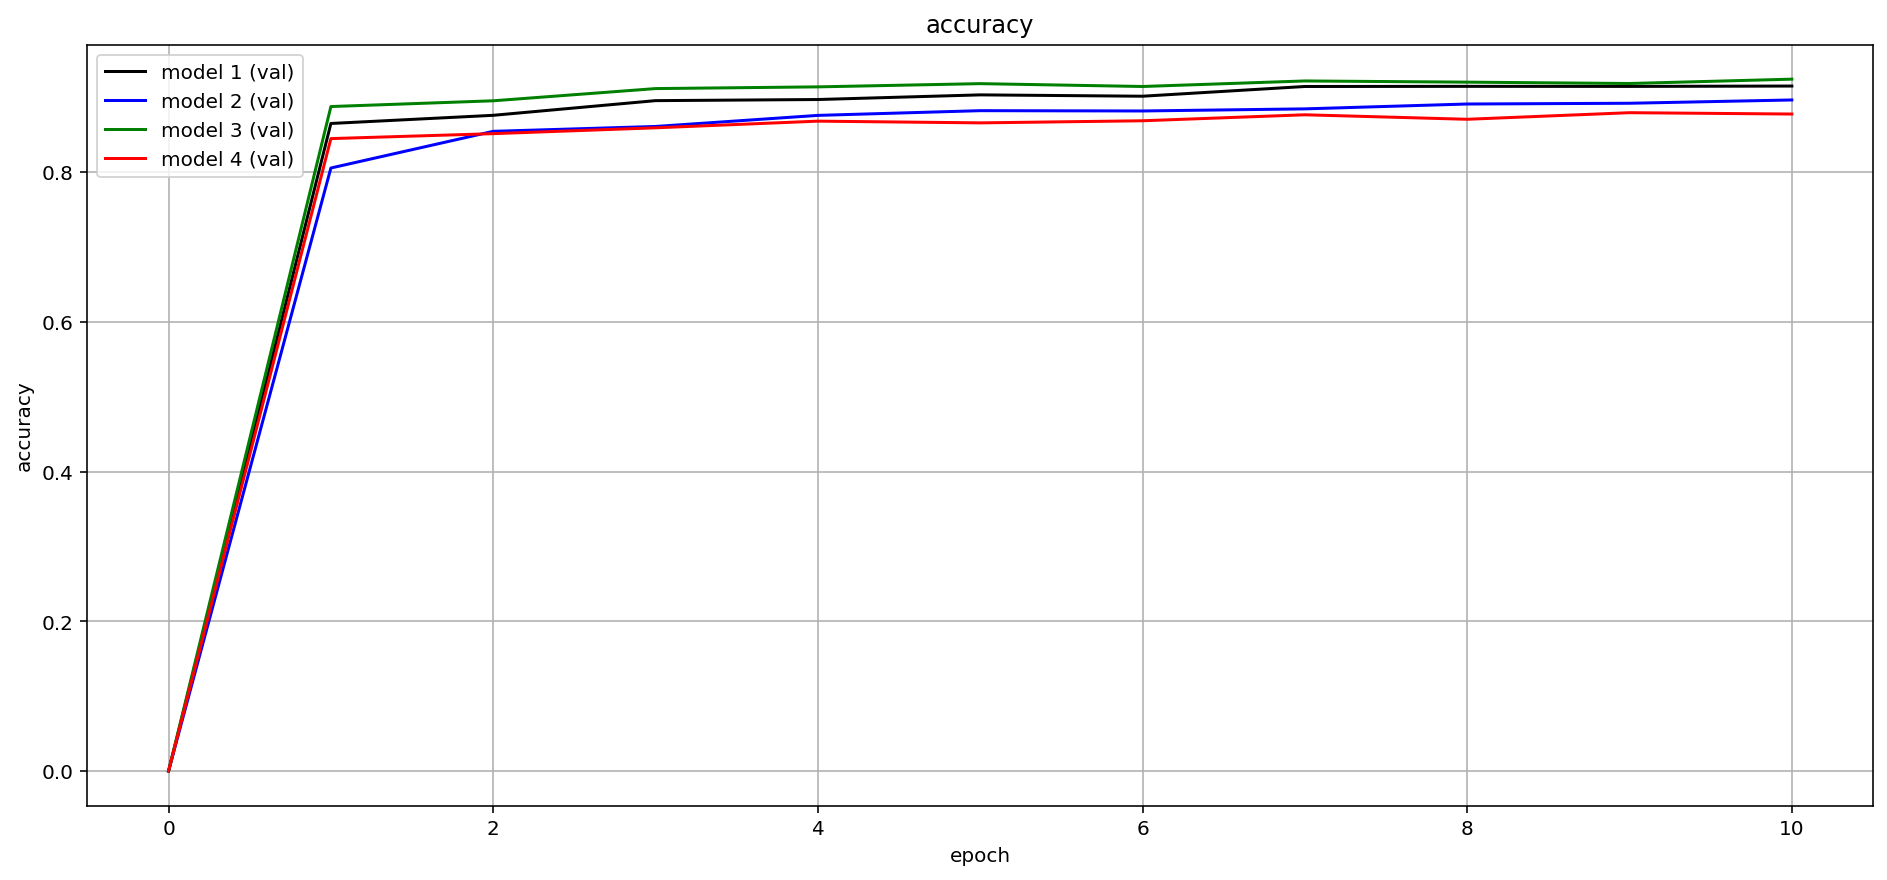

In [10]:
epoch = np.arange(epochs+1)
colors = {0: 'black', 1 : 'blue', 2 : 'green', 3: 'red', 4: 'magenta'}
plt.figure(figsize=(16,7))
for i, hist in enumerate(all_hist):
    plt.plot(epoch,[0]+hist.history['val_accuracy'],'-', label = 'model '+str(i+1)+' (val)', c=colors[i])

plt.legend()
plt.grid('On')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()